#  Do children belonging to the poorest Nigerian households have access to vaccination, quality water sources and access to cleaner energy than others? 

### Objective: This study asked several questions to observe whether children belonging to the poorest Nigerian households have access to vaccination, quality water sources and access to cleaner energy than others? 

Note: 

- The dataset used in this analysis was sourced from the 2018 demographic health surveys (DHS) for Nigeria https://www.dhsprogram.com/Data/. The DHS data captures information related to Sustainable Development Goals (SDGs), Nutrition, Malaria, Weath index, Family planning, Childhood mortality, Gender and so on. 

- The DHS Survey Indicators - Maternal and Child Health is used for this analysis. So the data captures the under five children across households, household's and mother's characteristics.

- Before answering the above question through analysis, it is important to acquire , explore and analyze the data so as to come up with verifiable findings. Thus, Section 1 acquires and prepares the data while section 2 analyzes the data.


### Section 1: Exploring the Demographic Health Surveys (DHS) Dataset for Nigeria. 

In [1]:
# importing the relevant python libraries
import csv
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import researchpy, pandas, numpy



In [2]:
# Data Injestion
dhs = pd.read_csv('new.csv',  dtype='unicode')
# I obtain data from https://www.dhsprogram.com/Data/ in Stata format which was converted to readable csv file for injestion in Python.

In [3]:
dhs.shape

(24940, 75)

Large dataset covering 24940 Nigerian households and 75 rows (about 75 variables).
- What variables are captured derived from this dataset?

In [4]:
dhs.head(15) # displays the first 15 components of the dataframe. 

,caseid,v001,v002,v003,v005,mth_age,zones,urb_rur,hh_elct,relgn,...,ARI_b,cooking_dum,floor,water_dum,DPT1,DPT2,DPT3,polio,diarrhea,wgt
0,908 89 2,908,89,2,1309890,31,south east,urban,no,catholic,...,None,Polluting Fuel,Others,Protected (well/borehole),No Vacination,No Vacination,No Vacination,No Vacination,0,1.30989
1,1233 154 2,1233,154,2,3311132,43,south west,urban,yes,islam,...,None,Polluting Fuel,Others,Unprotected well/spring,NaN,NaN,NaN,NaN,0,3.311132
2,867 74 3,867,74,3,1452346,25,south east,urban,no,catholic,...,None,Polluting Fuel,Earth/Sand,Unprotected well/spring,vacinated against diphtheria,vacinated against 2nd diphtheria,vacinated against 3rd diphtheria,vacinated against polio,0,1.452346
3,484 10 2,484,10,2,663762,22,north west,rural,no,islam,...,None,Polluting Fuel,Earth/Sand,Unprotected well/spring,NaN,NaN,NaN,NaN,0,0.66376197
4,45 39 2,45,39,2,220574,35,north central,urban,no,other christian,...,None,Cleaner Fuel,Others,Piped water,vacinated against diphtheria,vacinated against 2nd diphtheria,vacinated against 3rd diphtheria,vacinated against polio,0,0.22057401
5,915 45 9,915,45,9,1234631,26,south east,urban,yes,catholic,...,None,Polluting Fuel,Others,Unprotected well/spring,NaN,NaN,NaN,NaN,0,1.2346309
6,194 21 2,194,21,2,1163521,30,north central,rural,no,islam,...,NaN,Polluting Fuel,Earth/Sand,Protected (well/borehole),NaN,NaN,NaN,NaN,NaN,1.1635211
7,794 78 2,794,78,2,1463903,28,south east,urban,no,catholic,...,None,Polluting Fuel,Others,Unprotected well/spring,NaN,NaN,NaN,NaN,0,1.463903
8,259 27 2,259,27,2,1085701,25,north east,urban,no,islam,...,NaN,Polluting Fuel,Others,Unprotected well/spring,NaN,NaN,NaN,NaN,NaN,1.085701
9,138 26 1,138,26,1,520320,22,north central,rural,no,islam,...,None,Polluting Fuel,Earth/Sand,Unprotected well/spring,No Vacination,No Vacination,No Vacination,No Vacination,0,0.52032


In [5]:
# a display of all variable names 
for col in dhs.columns: 
    print(col) 

caseid
v001
v002
v003
v005
mth_age
zones
urb_rur
hh_elct
relgn
ethn
yrssch
hhsize
wlth
v463e
tabco
schl_hus
emp_mother
husch_yrs
brth_col
brth_no
gender_chld
age_chld
brst_fd
vcin_DPT1
vcin_polio
vcin_DPT2
h5d
vcin_DPT3
vcin
h11
cough
cough_acute
h38
age_chl_mnth
hw2
hw3
hw10
hw11
ml0
hhid
hv000
hv003
hv024
hv025
hv026
watr_src
hv205
electtc
car_trck
flr_typ
wall_typ
roof_typ
rel_hh
gender_hd
hd_age
toilt_shrd
cookng_fuel
bednt
cook_plc
kitchn_loc
index_wlth
index_wlthfct
year
ARI_a
ARI_b
cooking_dum
floor
water_dum
DPT1
DPT2
DPT3
polio
diarrhea
wgt


Given such a large dataset, trimming (slicing out irrelavant variables) the will display relevant variables of interest. These variables in no particular order include:
- gender_child = Gender of the child
- DPT1 = Fist Vaccination against Diphtheria, Pertussis (whooping cough), and Tetanus
- water_dum = Several sources of water - borehold, spring, well, and so on
- index_wlth = Poverty status of household - from poorest to richest
- ARI_a = Acute Respiratory Infection amongst children versus non
- diarrhea = Diarrhea prevalence versus non-prevalence
- zones= different geopolitical zones in Nigeria
- urb_rur = urban- rural location of households
- HHsize = total family size.
- cooking_dum= Household's access to energy types - cleaner fuel versus polluting fuel types  

## Slicing out irrelevant variables - generating new dataframe for this called "dhs_trimmed" from dhs

In [6]:
dhs_trimmed = dhs[['caseid', 'zones', 'urb_rur', 'hhsize', 'gender_chld', 'diarrhea', 'wgt', 'DPT1', 'DPT2', 'DPT3', 'water_dum', 'index_wlth', 'gender_hd', 'cooking_dum', 'cookng_fuel', 'ARI_a', 'electtc','bednt']]


In [7]:
dhs_trimmed.head() 

,caseid,zones,urb_rur,hhsize,gender_chld,diarrhea,wgt,DPT1,DPT2,DPT3,water_dum,index_wlth,gender_hd,cooking_dum,cookng_fuel,ARI_a,electtc,bednt
0,908 89 2,south east,urban,5,male,0,1.30989,No Vacination,No Vacination,No Vacination,Protected (well/borehole),richer,male,Polluting Fuel,kerosene,None,no,all children
1,1233 154 2,south west,urban,7,female,0,3.311132,NaN,NaN,NaN,Unprotected well/spring,richest,male,Polluting Fuel,kerosene,None,yes,no bednet in hh
2,867 74 3,south east,urban,7,male,0,1.452346,vacinated against diphtheria,vacinated against 2nd diphtheria,vacinated against 3rd diphtheria,Unprotected well/spring,poorest,male,Polluting Fuel,wood,None,no,no bednet in hh
3,484 10 2,north west,rural,5,female,0,0.66376197,NaN,NaN,NaN,Unprotected well/spring,poorest,male,Polluting Fuel,wood,None,no,all children
4,45 39 2,north central,urban,5,male,0,0.22057401,vacinated against diphtheria,vacinated against 2nd diphtheria,vacinated against 3rd diphtheria,Piped water,richest,male,Cleaner Fuel,lpg,Respiratory Infection1,no,no


- **Great! The data is trimmed - containing relevant variables.  Any reduction in the sample size?**

In [8]:
dhs_trimmed.shape

(24940, 18)

- Good, sample size did not reduce - about 24940 households sampled. But, there seem to be some missing data here. Need to explore this.

In [9]:
dhs_trimmed.isnull().any() #Confirming missing data

caseid         False
zones          False
urb_rur        False
hhsize         False
gender_chld    False
diarrhea        True
wgt            False
DPT1            True
DPT2            True
DPT3            True
water_dum      False
index_wlth     False
gender_hd      False
cooking_dum     True
cookng_fuel    False
ARI_a           True
electtc        False
bednt           True
dtype: bool

In [10]:
# DROP ALL MISSING ITEMS
dhs_trimmed = dhs_trimmed.dropna()

In [11]:
# CONFIRMING AGAIN THAT ALL MISSING ITEMS HAVE BEEN DROPPED
dhs_trimmed.isnull().any() 

caseid         False
zones          False
urb_rur        False
hhsize         False
gender_chld    False
diarrhea       False
wgt            False
DPT1           False
DPT2           False
DPT3           False
water_dum      False
index_wlth     False
gender_hd      False
cooking_dum    False
cookng_fuel    False
ARI_a          False
electtc        False
bednt          False
dtype: bool

Now, no missing values so far. All items are complete. How many observation are now available?

In [12]:
dhs_trimmed.shape

(13180, 18)

In [13]:
dhs_trimmed

,caseid,zones,urb_rur,hhsize,gender_chld,diarrhea,wgt,DPT1,DPT2,DPT3,water_dum,index_wlth,gender_hd,cooking_dum,cookng_fuel,ARI_a,electtc,bednt
0,908 89 2,south east,urban,5,male,0,1.30989,No Vacination,No Vacination,No Vacination,Protected (well/borehole),richer,male,Polluting Fuel,kerosene,None,no,all children
2,867 74 3,south east,urban,7,male,0,1.452346,vacinated against diphtheria,vacinated against 2nd diphtheria,vacinated against 3rd diphtheria,Unprotected well/spring,poorest,male,Polluting Fuel,wood,None,no,no bednet in hh
4,45 39 2,north central,urban,5,male,0,0.22057401,vacinated against diphtheria,vacinated against 2nd diphtheria,vacinated against 3rd diphtheria,Piped water,richest,male,Cleaner Fuel,lpg,Respiratory Infection1,no,no
9,138 26 1,north central,rural,2,male,0,0.52032,No Vacination,No Vacination,No Vacination,Unprotected well/spring,poorest,female,Polluting Fuel,wood,None,no,all children
10,265 10 7,north east,rural,11,male,0,0.457488,vacinated against diphtheria,vacinated against 2nd diphtheria,No Vacination,Unprotected well/spring,poorer,male,Polluting Fuel,wood,None,no,no bednet in hh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24929,406 5 3,north east,rural,5,female,0,0.58201802,vacinated against diphtheria,vacinated against 2nd diphtheria,vacinated against 3rd diphtheria,Unprotected well/spring,poorest,male,Polluting Fuel,wood,None,no,no bednet in hh
24930,457 37 2,north east,rural,8,female,1,0.66658401,No Vacination,No Vacination,No Vacination,Protected (well/borehole),poorest,male,Polluting Fuel,straw / shrubs / grass,Respiratory Infection1,no,all children
24933,1 64 2,north central,urban,4,male,0,1.33553,vacinated against diphtheria,vacinated against 2nd diphtheria,vacinated against 3rd diphtheria,Unprotected well/spring,richest,male,Cleaner Fuel,lpg,Respiratory Infection1,yes,all children
24934,8 33 2,north central,rural,4,male,1,1.601562,No Vacination,No Vacination,No Vacination,Protected (well/borehole),richer,male,Polluting Fuel,wood,None,yes,all children


- The dataset now contains 13467 households after dropping missing observations. 
- Indeed missing data exists in the sample - particularly for diarrhea, DPT1, DPT2, DPT3. 

# Section 2: Exploring each relevant variable

### 1. Household Poverty Status

#### How many children are found within the poor and rich households according?

In [14]:
dhs_trimmed['index_wlth'].value_counts() # COUNTING HOUSEHOLDS BY POVERTY STATUS


poorer     2816
poorest    2774
middle     2759
richer     2624
richest    2207
Name: index_wlth, dtype: int64

 - while the under5 children belonging to the poorer and poorest households constitutes the majority, children belonging to the richest households are fewer. 

In [15]:
# Establishing the proportion of children in poorer or poorest households
poorer_bool = dhs_trimmed["index_wlth"].str.contains("poorer")
poorer_bool.value_counts(normalize=True)


False    0.786343
True     0.213657
Name: index_wlth, dtype: float64

In [16]:
poorest_bool = dhs_trimmed["index_wlth"].str.contains("poorest")
poorest_bool.value_counts(normalize=True)

False    0.78953
True     0.21047
Name: index_wlth, dtype: float64

- **About 21% of children are found in poorer or poorest household.**
- **Summing up both groups imply that about 42% of children in these households are relatively poor than the other non-poor groups.**

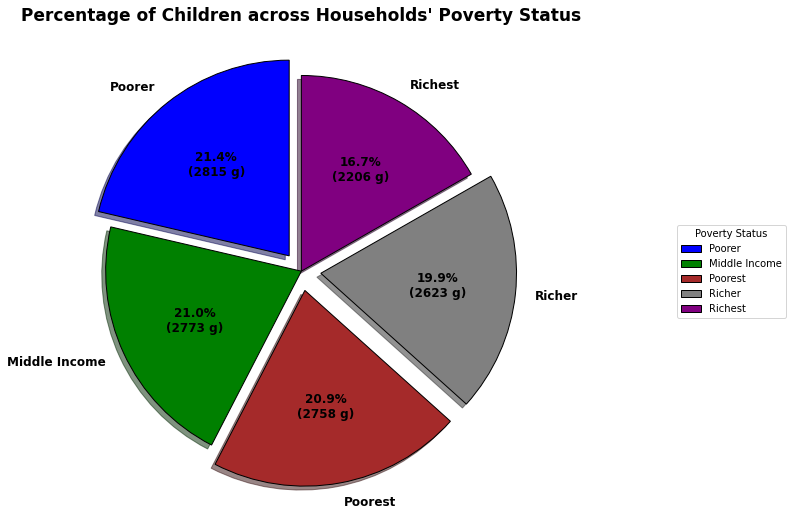

In [17]:
## Visual representation of all Households according to poverty status

# Import libraries 
import numpy as np 
import matplotlib.pyplot as plt 
  
  
# Creating dataset according to poverty counts shown above 
poor = ['Poorer', 'Middle Income', 'Poorest', 'Richer', 'Richest'] 
  
data = [2816, 2774, 2759, 2624, 2207] #using the above stat where poorer =2816; poorest=2774;middle=2759;richer=2624;richest    2207
  
  
# Creating explode data 
explode = (0.1, 0.0, 0.1, 0.1, 0.0,) 
  
# Creating color parameters 
colors = ( "blue", "green", "brown", "grey", "purple") 
  
# Wedge properties 
wp = { 'linewidth' : 1, 'edgecolor' : "black" } 
  
# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d} g)".format(pct, absolute) 
  
# Creating plot 
fig, ax = plt.subplots(figsize =(12, 9)) 
wedges, texts, autotexts = ax.pie(data,  
                                  autopct = lambda pct: func(pct, data), 
                                  explode = explode,  
                                  labels = poor, 
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="black", size = 12, weight ="bold")) 
  
# Adding legend 
ax.legend(wedges, poor, 
          title ="Poverty Status", 
          loc ="center right", 
          bbox_to_anchor =(1, 0, 0.5, 1)) 
  
plt.setp(autotexts, size = 12, weight ="bold") 
ax.set_title("Percentage of Children across Households' Poverty Status", size = 17, weight ="bold") 
  
# show plot 
plt.show() 

- **Just as observed above, about a greater percentage of children are poor (42%)** 
- **While the children belonging to the middle class is about 21%.**
- **Fewer number of children (17%) belong to rich rich families.**

## Regarding families with under 5, how does household poverty status vary by Gender of the family-head? 

In [18]:
female_bool = dhs_trimmed["gender_hd"].str.contains("female") # to capture the proportion of overall female and male headed families
female_bool.value_counts(normalize=True)

False    0.900152
True     0.099848
Name: gender_hd, dtype: float64

**Regarding the families with under5 children, about 10% of them are headed by females while the other 90% are headed by males.

In [19]:
# creating dataframes for female and male headed families separately.
female_df=dhs_trimmed.query('gender_hd=="female"') #female-headed families
female_df.head()


,caseid,zones,urb_rur,hhsize,gender_chld,diarrhea,wgt,DPT1,DPT2,DPT3,water_dum,index_wlth,gender_hd,cooking_dum,cookng_fuel,ARI_a,electtc,bednt
9,138 26 1,north central,rural,2,male,0,0.52032,No Vacination,No Vacination,No Vacination,Unprotected well/spring,poorest,female,Polluting Fuel,wood,None,no,all children
29,915 43 2,south east,urban,9,male,0,1.2346309,vacinated against diphtheria,vacinated against 2nd diphtheria,No Vacination,Unprotected well/spring,richer,female,Polluting Fuel,wood,Respiratory Infection1,yes,no
38,990 27 2,south south,rural,4,male,0,0.32967699,vacinated against diphtheria,vacinated against 2nd diphtheria,vacinated against 3rd diphtheria,Unprotected well/spring,richest,female,Cleaner Fuel,lpg,None,yes,no bednet in hh
89,909 14 3,south east,urban,6,male,0,0.846798,vacinated against diphtheria,vacinated against 2nd diphtheria,vacinated against 3rd diphtheria,Unprotected well/spring,richest,female,Polluting Fuel,wood,None,yes,no bednet in hh
99,998 61 1,south south,rural,5,male,0,0.52494699,vacinated against diphtheria,vacinated against 2nd diphtheria,vacinated against 3rd diphtheria,Unprotected well/spring,richer,female,Polluting Fuel,kerosene,None,no,no bednet in hh


In [20]:
male_df=dhs_trimmed.query('gender_hd=="male"') #male-headed families
male_df.head()


,caseid,zones,urb_rur,hhsize,gender_chld,diarrhea,wgt,DPT1,DPT2,DPT3,water_dum,index_wlth,gender_hd,cooking_dum,cookng_fuel,ARI_a,electtc,bednt
0,908 89 2,south east,urban,5,male,0,1.30989,No Vacination,No Vacination,No Vacination,Protected (well/borehole),richer,male,Polluting Fuel,kerosene,None,no,all children
2,867 74 3,south east,urban,7,male,0,1.452346,vacinated against diphtheria,vacinated against 2nd diphtheria,vacinated against 3rd diphtheria,Unprotected well/spring,poorest,male,Polluting Fuel,wood,None,no,no bednet in hh
4,45 39 2,north central,urban,5,male,0,0.22057401,vacinated against diphtheria,vacinated against 2nd diphtheria,vacinated against 3rd diphtheria,Piped water,richest,male,Cleaner Fuel,lpg,Respiratory Infection1,no,no
10,265 10 7,north east,rural,11,male,0,0.457488,vacinated against diphtheria,vacinated against 2nd diphtheria,No Vacination,Unprotected well/spring,poorer,male,Polluting Fuel,wood,None,no,no bednet in hh
12,172 19 2,north central,rural,3,male,0,0.26552501,No Vacination,No Vacination,No Vacination,Protected (well/borehole),middle,male,Polluting Fuel,wood,None,no,all children


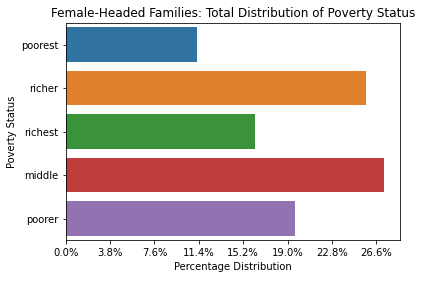

In [21]:
total = len(female_df['index_wlth'])*1.
ax = sns.countplot(y="index_wlth", data=female_df)
plt.title('Female-Headed Families: Total Distribution of Poverty Status')
plt.xlabel('Percentage Distribution')
plt.ylabel('Poverty Status')


for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_y()+0.1, p.get_height()+5))
_ = ax.set_xticklabels(map('{:.1f}%'.format, 100*ax.xaxis.get_majorticklocs()/total))

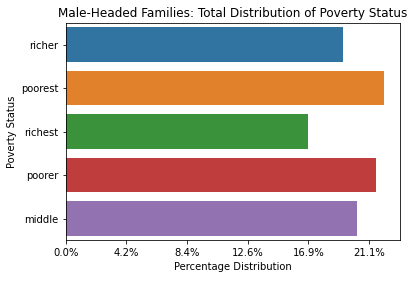

In [22]:
total = len(male_df['index_wlth'])*1.
ax = sns.countplot(y="index_wlth", data=male_df)
plt.title('Male-Headed Families: Total Distribution of Poverty Status')
plt.xlabel('Percentage Distribution')
plt.ylabel('Poverty Status')


for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_y()+0.1, p.get_height()+5))
_ = ax.set_xticklabels(map('{:.1f}%'.format, 100*ax.xaxis.get_majorticklocs()/total))

- A greater proportion of male-headed families belong to the poorest and poor groups when compared to female-headed ones.
- While richest households seem to be equally distributed amongst the male and female-headed families, about 27% of fchildren in female-headed families belong to the middle income group - which contrasts with the 21.5% reported in the male-headed category.
- Overall: implying that the under5 children belonging to female-headed families are relatively well-off

### 2. First Vaccination against Diphtheria, Pertussis (whooping cough), and Tetanus

#### How many  under5 children are vaccinated against  Diphtheria, Pertussis (whooping cough), and Tetanus in the first cycle?

In [23]:
dhs_trimmed['DPT1'].value_counts() # COUNTING CHILDREN'S VACCINATION STATUS


vacinated against diphtheria    8165
No Vacination                   5015
Name: DPT1, dtype: int64

In [24]:
dhs_trimmed['DPT1'].value_counts(normalize=True)


vacinated against diphtheria    0.619499
No Vacination                   0.380501
Name: DPT1, dtype: float64

- **A reasonable number of children are vaccinated against Diphtheria, Pertussis (whooping cough), and Tetanus in the first cycle.**
- **Roughly 62% of children are vaccinated and the other 38% are not!**
- We will investigate the demographic composition of those who got vaccinated and by poverty status in the coming sections. 

### 3. How are water Sources Distributed across households ?

In [25]:
dhs_trimmed['water_dum'].value_counts() # COUNTS OF NUMBER OF HOUSEHOLDS BY WATER SOURCES

Unprotected well/spring      8020
Protected (well/borehole)    3734
Piped water                  1426
Name: water_dum, dtype: int64

A greater number of households' water sources seem to be from unprotected well/spring sources. **What is the percentage distribution of these sources?** 

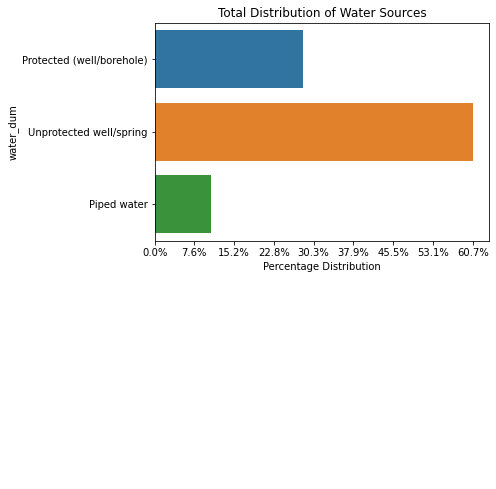

In [26]:
# Using the sns library to plot the distribiution of water sources by percentages
total = len(dhs_trimmed['water_dum'])*1.
ax = sns.countplot(y="water_dum", data=dhs_trimmed)
plt.title('Total Distribution of Water Sources')
plt.xlabel('Percentage Distribution')

# Obtaining the percentage distributions 
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_y()+0.1, p.get_height()+5))
_ = ax.set_xticklabels(map('{:.1f}%'.format, 100*ax.xaxis.get_majorticklocs()/total))

- About 60% of families rely more on unprotected water sources while about 10% of other households have access to cleaner water  such as piped water sources

### 4. How are sources of household energy consumption distributed?

In [27]:
dhs_trimmed['cookng_fuel'].value_counts() # COUNTS OF NUMBER OF HOUSEHOLDS BY WATER SOURCES

wood                      9603
kerosene                  1339
lpg                       1106
charcoal                   715
straw / shrubs / grass     163
natural gas                 88
electricity                 76
coal, lignite               56
biogas                      18
agricultural crop           16
Name: cookng_fuel, dtype: int64

- Wood energy utilization seem to dominate households' cooking fuel choices.

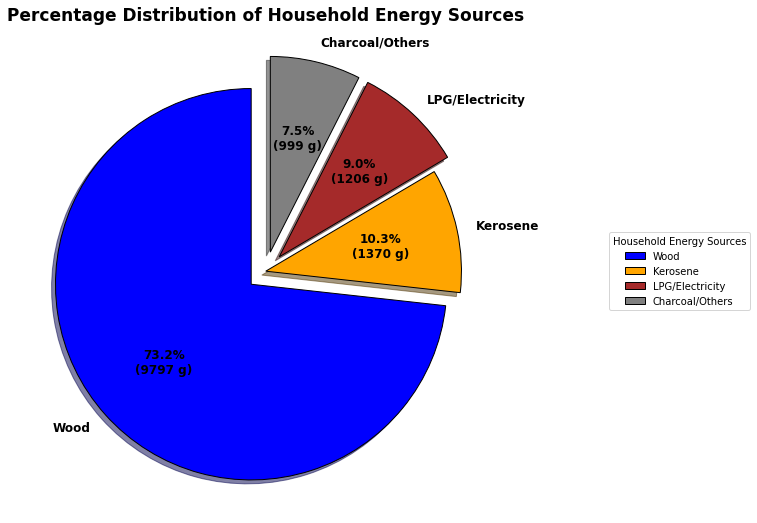

In [28]:
## Visual representation of all Households according to poverty status

# Import libraries 
import numpy as np 
import matplotlib.pyplot as plt 
  
  
# Creating dataset according to poverty counts shown above 
fuel = ['Wood', 'Kerosene', 'LPG/Electricity', 'Charcoal/Others'] 
  
data1 = [9797, 1371, 1207, 1000] 
  
  
# Creating explode data 
explode1 = (0.1, 0.0, 0.1, 0.1) 
  
# Creating color parameters 
colors = ( "blue", "orange", "brown", "grey") 
  
# Wedge properties 
wp = { 'linewidth' : 1, 'edgecolor' : "black" } 
  
# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d} g)".format(pct, absolute) 
  
# Creating plot 
fig, ax = plt.subplots(figsize =(12, 9)) 
wedges, texts, autotexts = ax.pie(data1,  
                                  autopct = lambda pct: func(pct, data1), 
                                  explode = explode1,  
                                  labels = fuel, 
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="black", size = 12, weight ="bold")) 
  
# Adding legend 
ax.legend(wedges, fuel, 
          title ="Household Energy Sources", 
          loc ="center right", 
          bbox_to_anchor =(1, 0, 0.5, 1)) 
  
plt.setp(autotexts, size = 12, weight ="bold") 
ax.set_title("Percentage Distribution of Household Energy Sources", size = 17, weight ="bold") 
  
# show plot 
plt.show() 

- The distribution of household energy sources are shown as above.
- About 73% of the Nigerian households utilize wood as their energy sources.
- Relatively cleaner energy source represents just 9% of the households.
- Kerosene consumption represents about 10% of all households.

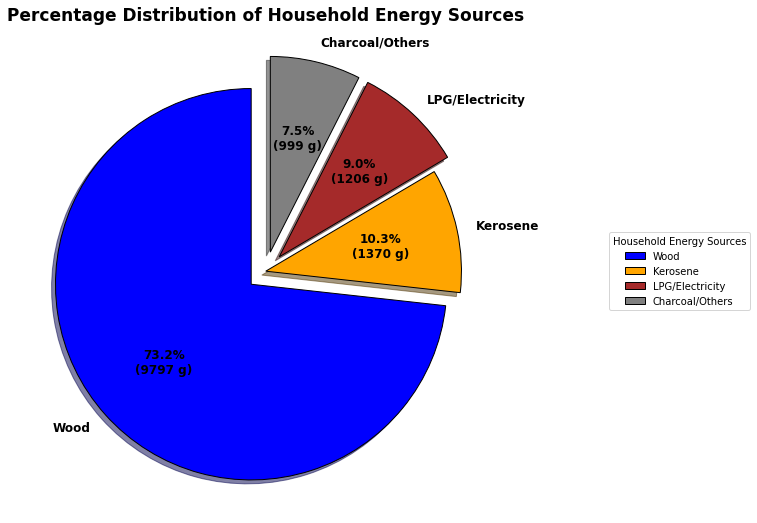

In [29]:
## Visual representation of all Households according to poverty status

# Import libraries 
import numpy as np 
import matplotlib.pyplot as plt 
  
  
# Creating dataset according to poverty counts shown above 
fuel = ['Wood', 'Kerosene', 'LPG/Electricity', 'Charcoal/Others'] 
  
data1 = [9797, 1371, 1207, 1000] 
  
  
# Creating explode data 
explode1 = (0.1, 0.0, 0.1, 0.1) 
  
# Creating color parameters 
colors = ( "blue", "orange", "brown", "grey") 
  
# Wedge properties 
wp = { 'linewidth' : 1, 'edgecolor' : "black" } 
  
# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d} g)".format(pct, absolute) 
  
# Creating plot 
fig, ax = plt.subplots(figsize =(12, 9)) 
wedges, texts, autotexts = ax.pie(data1,  
                                  autopct = lambda pct: func(pct, data1), 
                                  explode = explode1,  
                                  labels = fuel, 
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="black", size = 12, weight ="bold")) 
  
# Adding legend 
ax.legend(wedges, fuel, 
          title ="Household Energy Sources", 
          loc ="center right", 
          bbox_to_anchor =(1, 0, 0.5, 1)) 
  
plt.setp(autotexts, size = 12, weight ="bold") 
ax.set_title("Percentage Distribution of Household Energy Sources", size = 17, weight ="bold") 
  
# show plot 
plt.show() 

# Section 3: Data Analysis

## Question 1: What is the distribution of children in poorest households and those who got the vaccines (DPT)?

In [30]:
# Using the researchpy/crosstabs to calculate row proportions of children belonging to poorest, or poor households and who recieved DPT1 vaccines
crosstab, res = researchpy.crosstab(dhs_trimmed['index_wlth'], dhs_trimmed['DPT1'], test= "chi-square", prop= "row")
crosstab

DPT1                                    
DPT1       No Vacination vacinated against diphtheria    All
index_wlth                                                  
middle             35.34                        64.66  100.0
poorer             50.04                        49.96  100.0
poorest            62.80                        37.20  100.0
richer             23.25                        76.75  100.0
richest            12.64                        87.36  100.0
All                38.05                        61.95  100.0

In [31]:
# displays tests for proportionality betweeb poverty status and DPT1 vaccination 
res

,Chi-square test,results
0,Pearson Chi-square ( 4.0) =,1749.3238
1,p-value =,0.0000
2,Cramer's V =,0.3643


## Results:
1. The Pearson Chi-square test is highly signifcant confirming that the distributions of children across poverty status and DPT1 vaccination are not the same.
2. **About 63% of sampled children in poorest households are not vaccinated which is however different for in rich families**.
3. **While 50% of children in the sampled poorer household seem to be vaccinated, the other 50% are not.**
4. Over 65% of sampled children in middle income families recived the vaccines, while 87% of the richest group also recieved the vaccines.
 ## Overall: Children from poorest families are less likely to be vaccinated than other children belonging to others.

## Question 2: What is the distribution of children in poorest households and those  from households quality water sources?

In [32]:
# Again using the researchpy/crosstabs to calculate row proportions of children belonging each categories
crosstab1, res1 = researchpy.crosstab(dhs_trimmed['index_wlth'], dhs_trimmed['water_dum'], test= "chi-square", prop= "row")
crosstab1

water_dum                                                    \
water_dum  Piped water Protected (well/borehole) Unprotected well/spring   
index_wlth                                                                 
middle           11.78                     26.97                   61.25   
poorer            7.00                     39.13                   53.87   
poorest           4.72                     47.01                   48.27   
richer           14.71                     16.50                   68.79   
richest          17.54                      6.84                   75.62   
All              10.82                     28.33                   60.85   

                   
water_dum     All  
index_wlth         
middle      100.0  
poorer      100.0  
poorest     100.0  
richer      100.0  
richest     100.0  
All         100.0

In [33]:
res1

,Chi-square test,results
0,Pearson Chi-square ( 8.0) =,1414.2244
1,p-value =,0.0000
2,Cramer's V =,0.2316


## Result:
1. 5% of children in poorest families have access to piped water - compared to 18% of richest families.
2. Surprisingly, 76% of children from richest backgrounds tend use unprotected well or spring water sources.
3. Overall, the use of unprotected water sources seem to dominate households water usage in Nigeria.
4. The chi-square tests show that the proportion of households across the income categories are not the same - showing a clear difference in water consumption patterns in Nigeria.

## Question 3: What is the distribution of children in poorest households and those  from households utilizing cleaner energy sources?

In [34]:
# Again using the researchpy/crosstabs to calculate row proportions of children belonging each categories
crosstab2, res2 = researchpy.crosstab(dhs_trimmed['index_wlth'], dhs_trimmed['cooking_dum'], test= "chi-square", prop= "row")
crosstab2

cooking_dum                      
cooking_dum Cleaner Fuel Polluting Fuel    All
index_wlth                                    
middle              0.80          99.20  100.0
poorer              0.11          99.89  100.0
poorest             0.04          99.96  100.0
richer              8.19          91.81  100.0
richest            47.44          52.56  100.0
All                 9.77          90.23  100.0

In [35]:
res2

,Chi-square test,results
0,Pearson Chi-square ( 4.0) =,4407.4658
1,p-value =,0.0000
2,Cramer's V =,0.5783


## Result:
1. The Pearson Chi-square test is highly signifcant confirming that the distributions of children across poverty status and household cooking fuel choices  are not the same.
2. Poorest households' use of polluting fuel choices is widespread.
**3. About 48% of richest households use cleaner cooking fuels while 0.04% of poorest household adopt cleaner fuel options.**

## Overall: Polluting fuel choices seem to  highly related to poverty as advanced in the theoretical discussions

## Question 4: How do children in the poorest households varies by household headship, total household size, geopolitical zones and urban-rural concentration?

In [36]:
poor_df=dhs_trimmed.query('index_wlth=="poorest"') #Poorest households
poor_df.head()

,caseid,zones,urb_rur,hhsize,gender_chld,diarrhea,wgt,DPT1,DPT2,DPT3,water_dum,index_wlth,gender_hd,cooking_dum,cookng_fuel,ARI_a,electtc,bednt
2,867 74 3,south east,urban,7,male,0,1.452346,vacinated against diphtheria,vacinated against 2nd diphtheria,vacinated against 3rd diphtheria,Unprotected well/spring,poorest,male,Polluting Fuel,wood,None,no,no bednet in hh
9,138 26 1,north central,rural,2,male,0,0.52032,No Vacination,No Vacination,No Vacination,Unprotected well/spring,poorest,female,Polluting Fuel,wood,None,no,all children
55,1399 1 2,south west,rural,9,male,0,1.0238971,No Vacination,No Vacination,No Vacination,Unprotected well/spring,poorest,male,Polluting Fuel,wood,None,no,no bednet in hh
74,848 43 2,south east,urban,6,male,0,0.602911,vacinated against diphtheria,vacinated against 2nd diphtheria,vacinated against 3rd diphtheria,Unprotected well/spring,poorest,male,Polluting Fuel,wood,Respiratory Infection1,no,all children
75,541 8 4,north west,rural,6,male,0,3.2911799,No Vacination,No Vacination,No Vacination,Protected (well/borehole),poorest,male,Polluting Fuel,wood,None,no,all children


In [37]:
poor_df['hhsize']=pd.to_numeric(poor_df.hhsize) #To destring the household size variable (hhsize)
poor_df.dtypes

<ipython-input-37-53be210334b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poor_df['hhsize']=pd.to_numeric(poor_df.hhsize) #To destring the household size variable (hhsize)


caseid         object
zones          object
urb_rur        object
hhsize          int64
gender_chld    object
diarrhea       object
wgt            object
DPT1           object
DPT2           object
DPT3           object
water_dum      object
index_wlth     object
gender_hd      object
cooking_dum    object
cookng_fuel    object
ARI_a          object
electtc        object
bednt          object
dtype: object

In [38]:
poor_1=poor_df.groupby(['gender_hd', 'zones']).agg(mean_fam_size =("hhsize",'mean')) # Average household size by head's gender and zones

In [39]:
poor_1

mean_fam_size
gender_hd zones                       
female    north central       5.666667
          north east          6.913043
          north west          5.500000
          south east          5.583333
          south south         4.600000
          south west          5.000000
male      north central       7.055921
          north east          7.855634
          north west          8.114510
          south east          6.220339
          south south         6.207547
          south west          5.542169

**- In the Female-Headed Families:**
- Poorest households located in South-South and South-West zones have the smallest family sizes by an average of 5 members.
- Families in the North-East have the largest family members - an average of about 7 members per household.

**- In the Male-Headed Families:**
- Poorest households resident in the South (South-South and South-West and South-East) seem to have an average family size of 6 member per household. 
- Those in the North-West have an average of 8 members per household.
- Overall: Female headed households are leaner as compared to male headed ones.



In [40]:
poor_2=poor_df.groupby(['gender_hd', 'urb_rur']).agg(mean_fam_size =("hhsize",'mean')) # Average household size by head's gender and urban-rural regions

In [41]:
poor_2

mean_fam_size
gender_hd urb_rur               
female    rural         5.596899
          urban         5.368421
male      rural         7.756746
          urban         7.622120

**- In the Female-Headed Families:**
- Poorest households located in urban regions have the smallest family sizes by an average of 5 members compared to those in the rural places (6 members).

**- In the Male-Headed Families:**
- Poorest households resident in the urban and rural places  seem to have an average family size of 8 members per household. 

- Overall: Female headed households are leaner as compared to male headed ones.

End of the project